# [Keras]

## 1. 케라스(Keras) 기초부터 모델 생성까지

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png">

- 파이썬으로 작성된 오픈 소스 신경망 라이브러리
- CUP와 GPU에서 실행 가능
- 사용자 친화성, 모듈성, 확장성을 통해 빠르고 간편한 프로토타이핑 가능
- 컨볼루션 신경망, 순환 신경망, 그리고 둘의 조합까지 모두 지원
- Tensorflow, CNTK, THEANO에서 사용하는 API

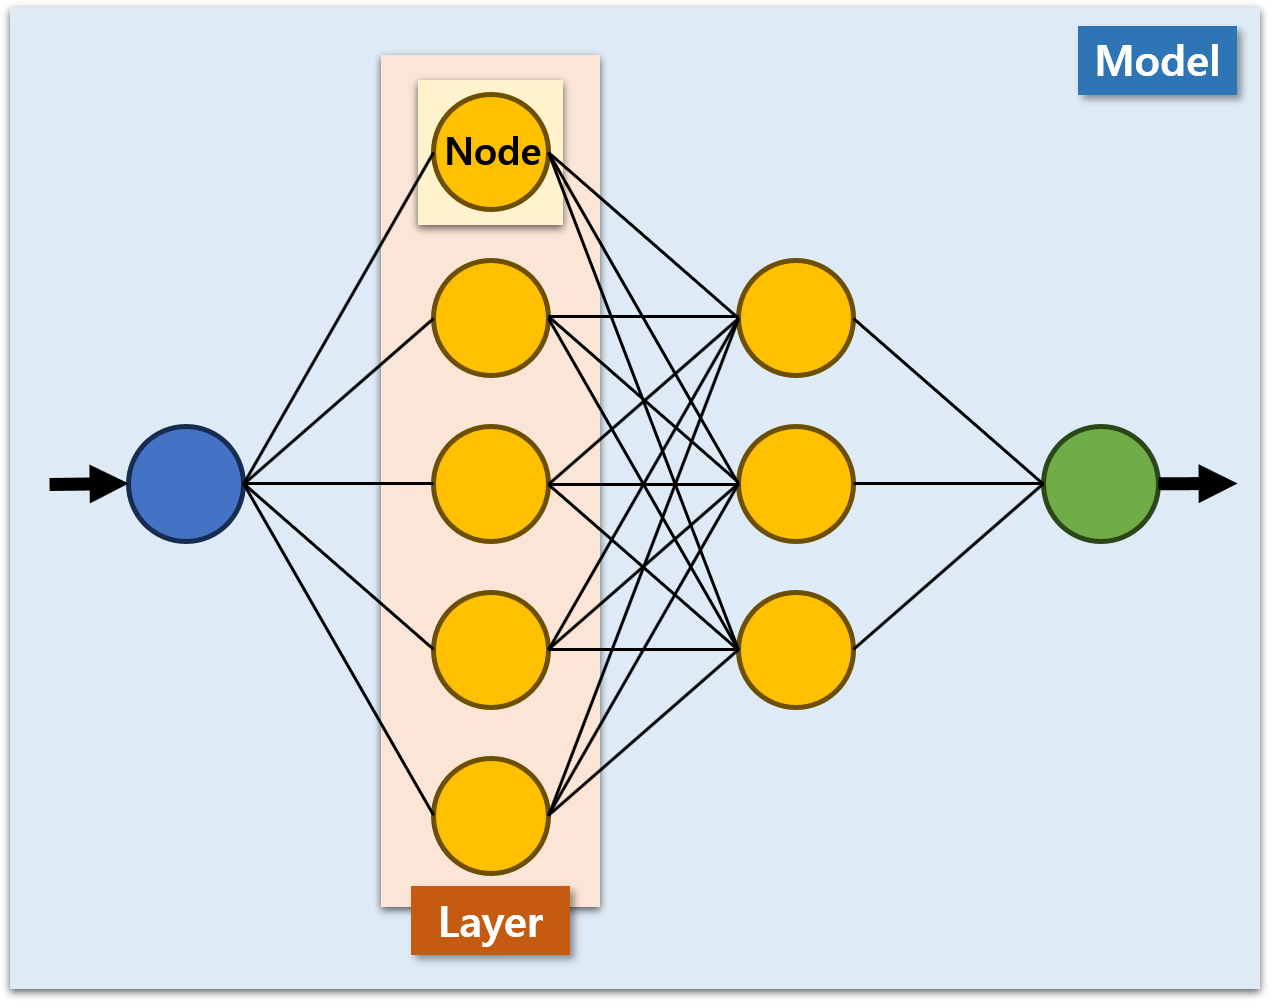

### 1) 노드
- 생물학의 신경세포(neuron)과 같은 개념
- 신경망을 구성하나 하나의 단위
- 입력데이터를 받아 이를 처리하고 출력 데이터 생성

### 2) 레이어
- 신경망(Newural Network)와 같은 개념
- 노드의 집합

### 3) 모델
- 레이어들을 구성하고 데이터가 신경망을 통과하는 흐름을 지정하는 방법

## 2. 딥러닝 모델
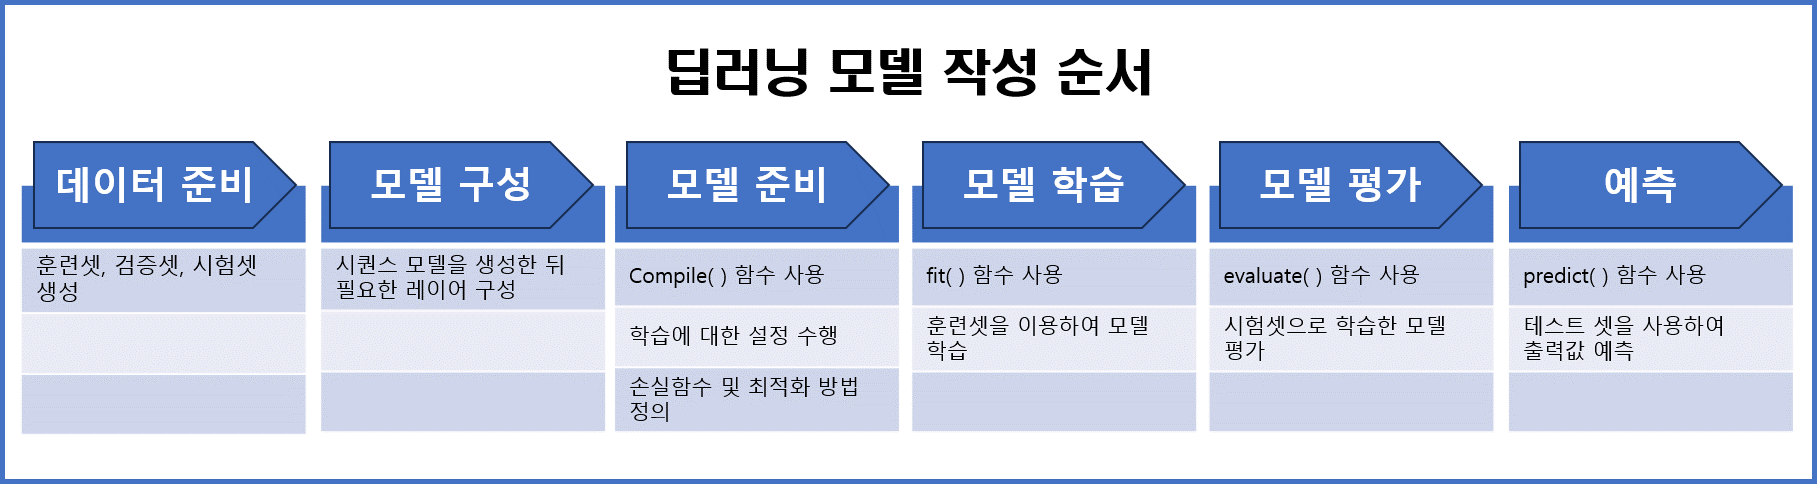

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

import numpy as np
import matplotlib.pyplot as plt

### 1단계) 데이터 준비
- 학습데이터(Train Data) 준비
- 테스트데이터(Test Data) 준비


In [ ]:
'''
# 학습 데이터
train_x = np.arange(1, 51)
train_y = train_x  * 2

# 테스트 데이터
test_x = np.arange(51, 101)
test_y = test_x * 2
'''


'\n# 학습 데이터\ntrain_x = np.arange(1, 51)\ntrain_y = train_x  * 2\n\n# 테스트 데이터\ntest_x = np.arange(51, 101)\ntest_y = test_x * 2\n'

In [ ]:
# 학습 데이터
train_x = np.random.uniform(1, 5, size = 100)
train_y = 10 * train_x + 3

# 테스트 데이터
test_x = np.random.uniform(5, 10, size = 100)

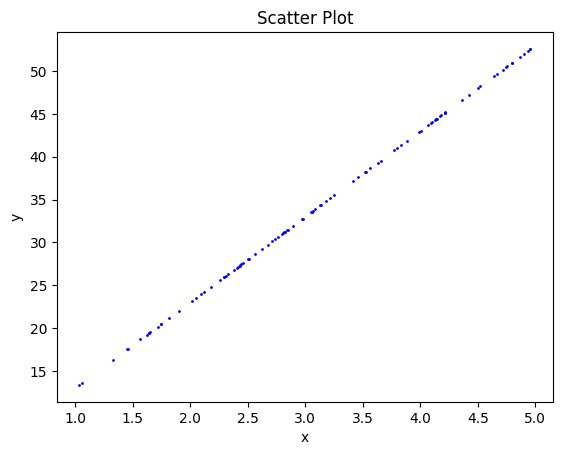

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

plt.scatter(train_x, train_y, color = 'blue', s = 1)

### 2단계) 모델 구성

#### Dense

- 첫번째 인자(units) : 출력 뉴런의 수를 설정

- input_dim : 입력 뉴련의 수를 설정

- kernel_initializer : 가중치를 초기화하는 방법을 설정
  - uniform : 균일 분포
  - normal : 가우시안 분포
  - activation : 활성화함수를 설정
  - linear : 디폴트 값으로 입력값과 가중치로 계산된 결과 값이 그대로 출력
  - sigmoid : 시그모이드 함수로 이진분류에서 출력층에 사용
  - softmax : 소프드맥스 함수로 다중클래스 분류문제에서 출력층에 사용
  - relu: Rectified Linear Unit 함수로 은닉층에서 사용

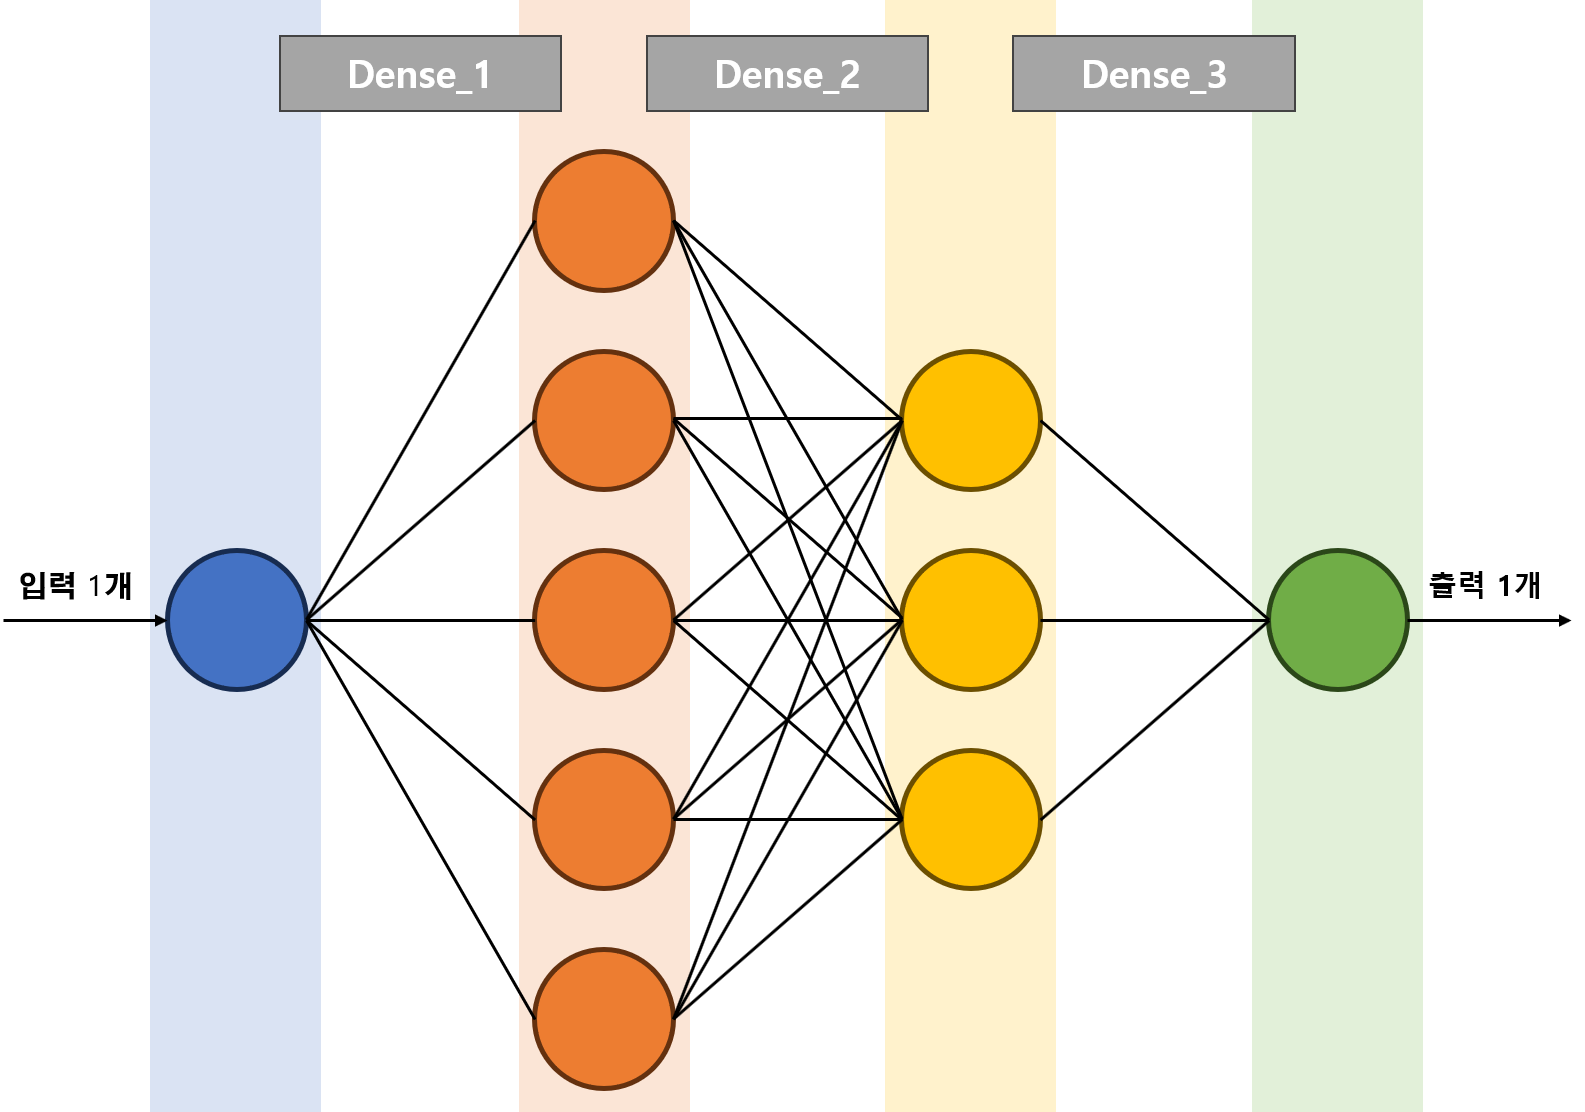

In [ ]:
# 모델 구성 시작
model = Sequential()

# add()을 이용한 첫 번째 레이어 추가
# 1개의 입력 노드, 5개의 출력 노드, 활성화함수 relu
# relu함수 : 음수일 때 그레이디언트는 0, 양수일때 1
model.add(Dense(5, input_dim = 1, activation = 'relu', name = "Dense_1"))

# add()을 이용한 두 번째 레이어 추가
# 3개의 출력 노드
model.add(Dense(3, name = "Dense_2"))

# add()을 이용한 세 번째 레이어 추가
model.add(Dense(1, name = "Dense_3"))

In [ ]:
# 모델 확인하기
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 5)                 10        
                                                                 
 Dense_2 (Dense)             (None, 3)                 18        
                                                                 
 Dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32
Trainable params: 32
Non-trainable params: 0
_________________________________________________________________


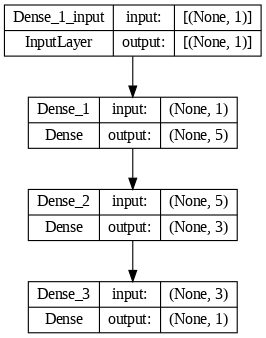

In [ ]:
plot_model(model, show_shapes=True, dpi=80)

### 3단계) 모델 준비
- loss : 모델이 예측한 값과 실제 타겟 값 사이의 차이를 측정하는 함수
  - MSE(Means Squared Error, 평균제곱오차)
  ## MSE = (1/n) * Σ(yᵢ - ŷᵢ)²
- optimizer : 손실 함수를 최소화하기 위해 모델의 파라미터를 업데이트 하는 알고리즘
  - 경사 하강법(Gradient Descent)
 <img src=" https://hackernoon.com/hn-images/1*ZmzSnV6xluGa42wtU7KYVA.gif">(출처 : 공돌이의 수학정리노트)
  - 아담(Adam)
  - RMSprop
- Metrics : 모델의 성능을 측정하기 위해 사용되는 지표

In [ ]:
model.compile(loss='mse', optimizer='adam', metrics = ['acc'])

### 4단계) 모델 학습
  - fit(x, y)함수
    - epochs : 전체 데이터셋을 한 번 훈련하는 단위
    - batch_size : 한 번에 모델에 입력되는 데이터의 개수, 모델이 한번에 처리하는 데이터의 양

In [ ]:
model.fit(train_x, train_y, epochs = 100, batch_size = 1)

Epoch 1/100
100/100 [==============================] - 3s 5ms/step - loss: 1265.9182 - acc: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 0s 4ms/step - loss: 1169.6223 - acc: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 1032.8079 - acc: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 0s 4ms/step - loss: 855.2054 - acc: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 651.3227 - acc: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 444.3760 - acc: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 266.9975 - acc: 0.0000e+00
Epoch 8/100
100/100 [==============================] - 0s 5ms/step - loss: 134.6757 - acc: 0.0000e+00
Epoch 9/100
100/100 [==============================] - 0s 5ms/step - loss: 57.0071 - acc: 0.0000e+00
Epoch 10/100
100/100 [==============================] - 1s 5ms/step - loss: 20.7

### 5단계) 모델 평가
- evaluate() : 모델 성능 평가를 위해 테스트 데이터 셋을 사용하여 손실값(loss)과 지정된 메트릭(metric) 값을 계산
- loss : 손실값, 모델의 예측 값과 실제 타겟 값과 차이
- acc : epoch에서 계산된 정확도 값, 0에 가까울 수록 정확도가 높음

In [ ]:
model.evaluate(train_x, train_y, batch_size = 1)

100/100 [==============================] - 0s 1ms/step - loss: 4.6123e-09 - acc: 0.0000e+00


[4.612320303465367e-09, 0.0]

### 6단계) 예측
- test_x의 값을 넣었을 때, 예측값 확인

In [ ]:
pred_y = model.predict(test_x)
print(pred_y)


4/4 [==============================] - 0s 3ms/step
[[ 63.284096]
 [ 68.27145 ]
 [ 67.94389 ]
 [ 76.342   ]
 [ 90.29462 ]
 [102.92807 ]
 [ 79.29681 ]
 [ 85.436195]
 [102.3881  ]
 [ 91.32484 ]
 [ 54.75728 ]
 [ 53.239395]
 [ 66.44892 ]
 [ 97.756516]
 [ 84.60667 ]
 [ 64.18486 ]
 [ 81.3833  ]
 [ 77.70685 ]
 [ 66.67894 ]
 [ 53.544556]
 [ 77.28697 ]
 [ 94.07043 ]
 [ 62.31052 ]
 [ 63.844997]
 [ 99.2015  ]
 [ 99.74387 ]
 [ 81.480644]
 [ 98.771645]
 [ 61.37588 ]
 [ 95.992424]
 [ 68.81347 ]
 [102.08736 ]
 [ 84.09072 ]
 [ 58.307076]
 [ 95.25372 ]
 [101.27373 ]
 [ 77.90743 ]
 [102.37134 ]
 [ 73.681404]
 [ 59.587776]
 [ 84.66903 ]
 [ 94.37708 ]
 [ 61.00254 ]
 [ 53.625034]
 [ 68.82651 ]
 [ 81.54276 ]
 [ 54.950615]
 [ 77.643875]
 [ 53.31527 ]
 [ 76.87519 ]
 [ 62.488335]
 [ 82.134155]
 [ 89.84634 ]
 [ 89.81728 ]
 [ 63.512985]
 [102.33294 ]
 [ 91.42859 ]
 [ 55.386124]
 [ 57.69378 ]
 [ 60.79489 ]
 [ 83.55352 ]
 [100.30485 ]
 [ 74.02887 ]
 [ 93.98379 ]
 [ 74.29539 ]
 [ 58.163536]
 [ 77.95099 ]
 [ 60.13175

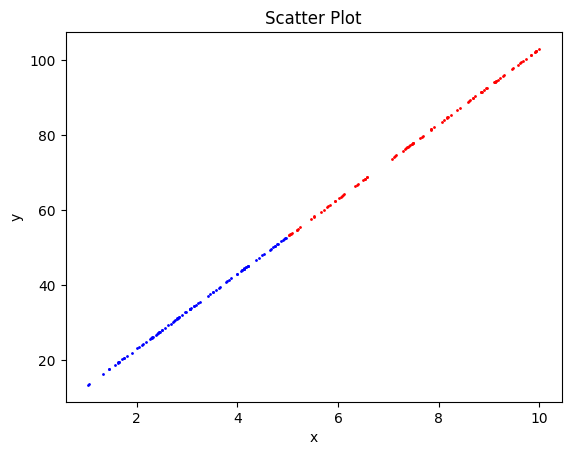

In [ ]:
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')

plt.scatter(train_x, train_y, color = 'blue', s = 1)
plt.scatter(test_x, pred_y, color = 'red', s = 1)
plt.show()

## 4. 딥러닝 모델 예제 - iris

참고 : https://pinkwink.kr/1128

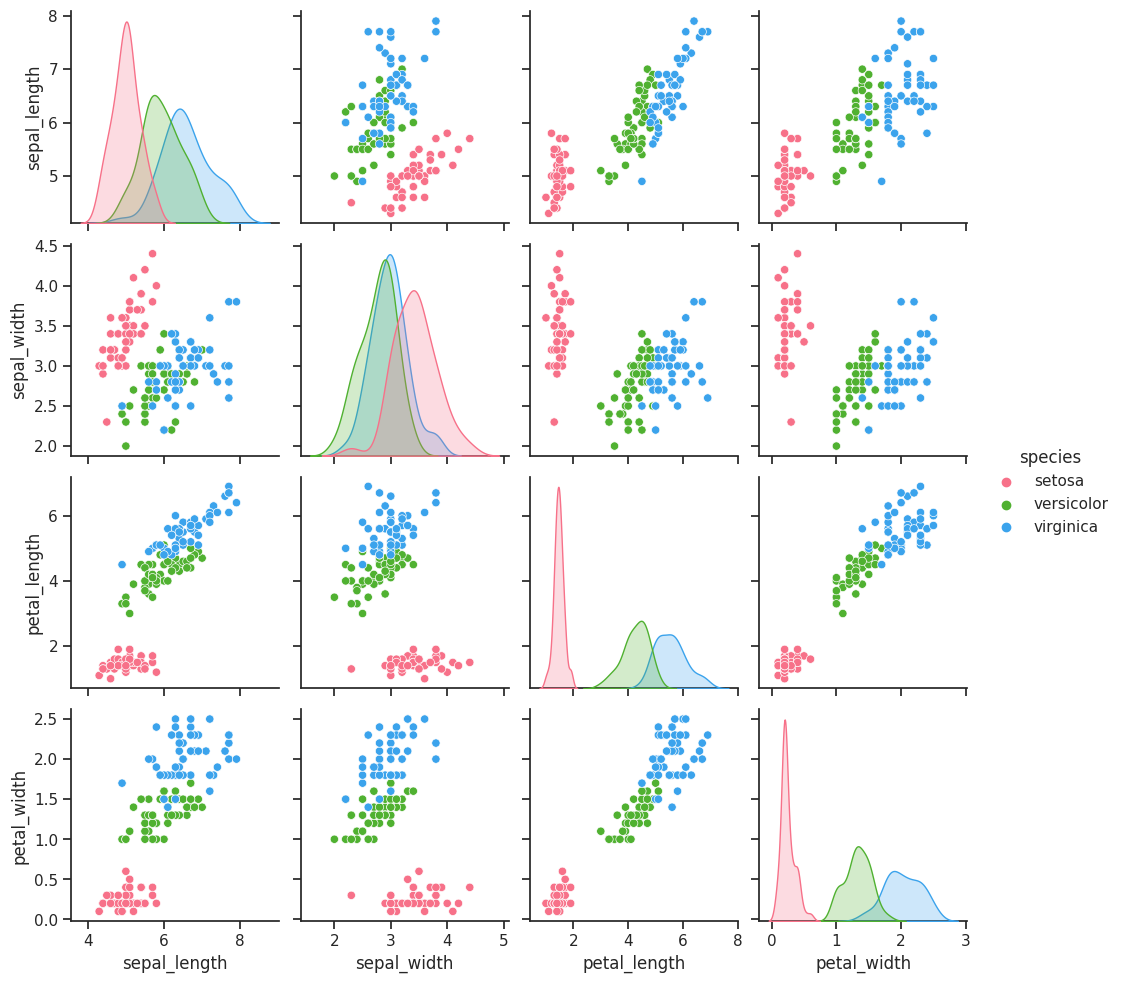

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

### 1단계) 데이터 *준비*

In [ ]:
# 데이터 전처리

from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

X, y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [ ]:
encoder =  LabelEncoder()
# setosa : 0, versicolor : 1, virginica :2
y1 = encoder.fit_transform(y)
# 원핫인코딩 방식 변환
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
# 학습데이터 (80%), 훈련데이터 (20%) 분류

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state =1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

### 2단계) 모델 구성

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

# softmax : 소프드맥스 함수로 다중클래스 분류문제에서 출력층에 사용
# relu: Rectified Linear Unit 함수로 은닉층에서 사용

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


### 3단계) 모델 준비

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

model.summary()

### 4단계) 모델 학습

In [ ]:
# validation_data : 검증데이터

model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 53ms/step - loss: 0.0709 - accuracy: 0.9667 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 2/100
4/4 [==============================] - 0s 26ms/step - loss: 0.0658 - accuracy: 0.9750 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 3/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0699 - accuracy: 0.9833 - val_loss: 0.0539 - val_accuracy: 1.0000
Epoch 4/100
4/4 [==============================] - 0s 20ms/step - loss: 0.0674 - accuracy: 0.9750 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 5/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0661 - accuracy: 0.9750 - val_loss: 0.0392 - val_accuracy: 1.0000
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0654 - accuracy: 0.9750 - val_loss: 0.0396 - val_accuracy: 1.0000
Epoch 7/100
4/4 [==============================] - 0s 14ms/step - loss: 0.0712 - accuracy: 0.9750 - val_loss: 0.0506 - val_accuracy: 1.0000
Epoch 8/100
4/4 [===

### 5단계) 모델 평가

- loss (손실) : Loss는 모델의 예측과 실제 값 사이의 차이를 측정하는 지표

- accuracy (정확도) :  0과 1 사이의 값으로 표현되며, 1에 가까울수록 더 좋은 성능
  - Accuracy = (올바르게 분류된 샘플 수) / (전체 샘플 수)

In [ ]:
# 손실, 정확도 계산

loss, accuracy = model.evaluate(X_test, y_test)

loss, accuracy

1/1 [==============================] - 0s 48ms/step - loss: 0.0330 - accuracy: 1.0000


(0.03296962007880211, 1.0)

### 6단계) 예측

In [ ]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

result = pd.DataFrame(X_test, columns = iris.columns[:-1])
result['species'] = y_test_class
result['pred species'] = y_pred_class

result


1/1 [==============================] - 0s 108ms/step


,sepal_length,sepal_width,petal_length,petal_width,species,pred species
0,5.8,4.0,1.2,0.2,0,0
1,5.1,2.5,3.0,1.1,1,1
2,6.6,3.0,4.4,1.4,1,1
3,5.4,3.9,1.3,0.4,0,0
4,7.9,3.8,6.4,2.0,2,2
5,6.3,3.3,4.7,1.6,1,1
6,6.9,3.1,5.1,2.3,2,2
7,5.1,3.8,1.9,0.4,0,0
8,4.7,3.2,1.6,0.2,0,0
9,6.9,3.2,5.7,2.3,2,2
